# Machine Learning Approach to Predicting Patient Mortality in Heart Failure

## Table of Contents
### 1. Project Overview and Setup

* 1.1 Introduction and Project Goal
* 1.2 Literature Review / Benchmarks
* 1.3 Dataset Acquisition and Loading
* 1.4 Data Overview
* 1.5 Attribute Description and Clinical Relevance

### 2. Exploratory Data Analysis

* 2.1 Descriptive Statistics
* 2.2 Univariate Analysis
* 2.3 Bivariate Analysis
* 2.4 Correlation Analysis

### 3. Data Preprocessing and Cleaning

* 3.1 Outlier Handling and Justification
* 3.2 Feature Scaling and Normalization
* 3.3 Data Splitting

### 4. Feature Selection

* 4.1 Method 1: Filter Method
* 4.2 Method 2: Wrapper Method
* 4.3 Method 3: Embedded Method
* 4.4 Feature Selection Summary and Rationale

### 5. Model Development and Evaluation

* 5.1 Model 1: Decision Tree Classifier
* 5.2 Model 2: Support Vector Machine
* 5.3 Model 3: Random Forest Classifier

### 6. Results and Discussion

* 6.1 Performance Comparison Table (Accuracy, Precision, Recall, F-Measure)
* 6.2 Model Interpretation and Feature Importance Discussion
* 6.3 Conclusion and Project Limitations
* 6.4 References
* 6.5 Acknowledgment of AI Usage

## 1. Project Overview and Setup
### 1.1 Introduction and Project Goal

#### Introduction

Cardiovascular diseases are the leading cause of death worldwide, with heart failure representing a critical endpoint of various such conditions. Patients diagnosed with heart failure face significant risk, making the accurate prediction of their prognosis essential for clinical decision-making and optimizing treatment planning. This project utilizes the Heart Failure Clinical Records Dataset from the UCI Machine Learning Repository. This dataset comprises the medical records and clinical features of 299 patients, including important physiological metrics such as ejection fraction, serum creatinine, and age.

#### Project Goal

The primary goal of this project is to develop, evaluate, and compare various machine learning classification models to accurately predict patient mortality as indicated by the DEATH_EVENT feature during the follow-up period. The project seeks to establish a comprehensive and reproducible data analysis pipeline encompassing all stages from data cleaning to model evaluation. Key clinical features that most strongly influence mortality predictions will be identified. Three different classification algorithms consisting of a Decision Tree, a Support Vector Machine, and an Ensemble method will be benchmarked using 10-fold cross-validation. The optimal model will be selected based on performance metrics including accuracy, precision, recall, and F-measure with particular emphasis on recall for the mortality class to minimize false negatives in this medically critical scenario.


### 1.2 Literature Review / Benchmarks
TODO

### 1.3 Dataset Acquisition and Loading

The Heart Failure Clinical Records Dataset was obtained from the UCI Machine Learning Repository. As per the project requirements, the data file has been downloaded and placed directly within the project's root folder.
The dataset is loaded using the pandas library and stored in a DataFrame for subsequent analysis.

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import randint
from itertools import combinations

In [4]:
file_path = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(file_path)

### 1.4 Data Overview
The Heart Failure Clinical Records dataset is a multivariate dataset comprised of 299 patient records and 13 clinical features. The dataset contains no explicit missing values, simplifying the initial cleaning phase.

The features can be broadly categorized as follows:

1.  **Demographic/Continuous:** `age`.
2.  **Clinical Measurements:** `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine`, `serum_sodium`, `time`.
3.  **Binary/Boolean Factors:** `anaemia`, `diabetes`, `high_blood_pressure`,`smoking`, `sex`.


In [5]:
print("Data Types and Non-Null Counts:")
df.info()

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory u

In [6]:
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
74,69.0,0,582,0,20,0,266000.0,1.2,134,1,1,73,1
11,62.0,0,231,0,25,1,253000.0,0.9,140,1,1,10,1
19,48.0,1,582,1,55,0,87000.0,1.9,121,0,0,15,1
207,85.0,0,212,0,38,0,186000.0,0.9,136,1,0,187,0
98,60.0,1,156,1,25,1,318000.0,1.2,137,0,0,85,0


#### Target Variable

The primary target variable for this classification task is **`DEATH_EVENT`**.

* This is a binary (0 or 1) variable indicating whether the patient died during the follow-up period.
* **1** represents the positive class (mortality/death event).
* **0** represents the negative class (survival).

A quick initial inspection reveals that the target variable is imbalanced, a critical factor we must address during model training and evaluation.

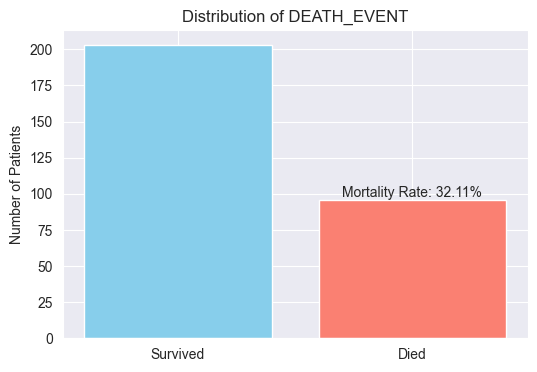

In [7]:
counts = df['DEATH_EVENT'].value_counts()
labels = ['Survived', 'Died']

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Distribution of DEATH_EVENT')
plt.ylabel('Number of Patients')

mortality_rate = df['DEATH_EVENT'].mean()
plt.text(1, counts[1] + 2, f'Mortality Rate: {mortality_rate:.2%}', ha='center', fontsize=10)

plt.show()


### 1.5 Attribute Description and Clinical Relevance

The attributes included in this dataset offer insight into the clinical status of patients with heart failure. Most of these factors are established risk factors or biomarkers associated with the prognosis and mortality of heart failure patients.

#### Demographic and Continuous Variable

| Attribute | Description and Unit | Clinical Significance in Relation to Heart Failure                                                                                                                           |
| :--- | :--- |:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **`age`** | Age of the patient in years. | Age influences the impact of certain factors such as body mass index and depressive symptoms on all-cause mortality, with older patients showing a markedly higher risk [1]. |


#### Clinical Measurements

| Attribute | Description and Unit | Clinical Significance in Relation to Heart Failure                                                                                                                                                                                                         |
| :--- | :--- |:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **`creatinine_phosphokinase` (CPK)** | Level of the CPK enzyme in the blood (mcg/L). | CPK is a marker for muscle damage and can be elevated after myocardial injury (heart attack). High CPK levels may indicate more extensive damage to the heart muscle and are potentially linked to a worse prognosis [2].                                  |
| **`ejection_fraction`** | Percentage of blood leaving the heart at each contraction (percentage). | This is the single most important measure of the heart's pumping function. A low Ejection Fraction (EF < 40%) typically defines Heart Failure with reduced Ejection Fraction (HFrEF) and is a strong independent predictor of mortality and morbidity [3]. |
| **`platelets`** | Platelets in the blood (kiloplatelets/mL). | Platelets play a role in blood clotting and inflammation. While complex, abnormal platelet counts (too high or too low) may indicate underlying inflammatory or thrombotic processes associated with a worse cardiac prognosis [4].                        |
| **`serum_creatinine`** | Level of serum creatinine in the blood (mg/dL). | Creatinine is a waste product whose accumulation indicates reduced kidney function. In heart failure, kidney function is often impaired (cardio-renal syndrome). Elevated creatinine levels are a strong predictor of increased mortality rates [5].       |
| **`serum_sodium`** | Level of serum sodium in the blood (mEq/L). | Low serum sodium levels (**Hyponatremia**) are common in severe heart failure and often reflect fluid overload and poor prognosis. It is an established independent predictor of mortality risk [6].                                                       |
| **`time`** | Duration of the follow-up period in days. | Although not a direct risk factor, this feature represents the duration the patient was observed in the study. It is crucial for survival modeling, as it represents the time until the target event (`DEATH_EVENT`) or the censoring [7].                 |


#### Binary and Categorical Factors

| Attribute | Description (0 or 1) | Clinical Significance in Relation to Heart Failure                                                                                                                                                                                      |
| :--- | :--- |:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **`anaemia`** | Indicates whether the patient suffers from anaemia (0 = No, 1 = Yes). | Anaemia (low red blood cell count) is prevalent in HF patients. It reduces the oxygen-carrying capacity of the blood, increases the strain on the heart, and is associated with poorer clinical outcomes and increased mortality [8].   |
| **`diabetes`** | Indicates whether the patient is diabetic (0 = No, 1 = Yes). | Diabetes Mellitus is an established risk factor for cardiovascular disease. It causes direct damage to blood vessels and heart muscle, significantly increasing the risk of HF and complications [9].                                   |
| **`high_blood_pressure`** | Indicates whether the patient suffers from hypertension (0 = No, 1 = Yes). | High blood pressure (Hypertension) is the most common cause of heart failure. Increased vascular resistance forces the heart to work harder, leading to the thickening and eventual weakening of the heart muscle [10].                 |
| **`smoking`** | Indicates whether the patient smokes or has a history of smoking (0 = No, 1 = Yes). | Smoking is a major cardiovascular risk factor. It damages blood vessels, increases the tendency for thrombosis, and is directly linked to the development and progression of heart failure [11].                                        |
| **`sex`** | Patient's gender (0 = Female, 1 = Male). | Biological sex can influence the prevalence and course of heart failure. Men often develop the disease earlier, while women tend to have a different form of HF (HFpEF), and sex can influence the response to certain treatments [12]. |
| **`DEATH_EVENT`** | **Target Variable:** Indicates whether the patient died (0 = Survived, 1 = Died). | This is the objective of the classification model and serves as the binary label for predicting mortality in heart failure patients.                                                                                                    |

## 2. Exploratory Data Analysis
### 2.1 Descriptive Statistics

The first step in Exploratory Data Analysis (EDA) is to generate descriptive statistics to understand the distribution, central tendency, and spread of the numerical features. This overview is crucial for identifying potential data quality issues, such as outliers or significant skewness, which must be addressed during the preprocessing phase (Section 3.1).


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


#### Key Observations

1.  **Age (`age`):** The average age of patients in the dataset is approximately 60 years, reflecting the clinical reality that heart failure is predominantly a disease of the elderly.
2.  **Critical Biomarkers (Prognosis):**
    * **Ejection Fraction (`ejection_fraction`):** The mean is around 38%. Since values below 40% are classified as Heart Failure with reduced Ejection Fraction (HFrEF), this indicates that the cohort represents a high-risk patient population, confirming the critical nature of the dataset.
    * **Serum Creatinine (`serum_creatinine`):** The mean is 1.39 mg/dL. Given that clinically normal values are typically below 1.2 mg/dL, this elevated average suggests a widespread presence of renal dysfunction (cardio-renal syndrome) within the cohort, which is a strong negative prognostic factor.
3.  **Variability and Outliers:**
    * **Creatinine Phosphokinase (`creatinine_phosphokinase`):** This feature exhibits an extremely high standard deviation (approx. 970) relative to its mean (approx. 582). This high variability and skewness strongly suggest the presence of significant outliers (maximum value is 7861), which necessitates closer inspection and potential capping or transformation in the data cleaning steps.


### 2.2 Univariate Analysis (Histograms, Counts)

Univariate analysis focuses on examining the distribution of each feature independently, providing visual confirmation of the observations made in the descriptive statistics phase. We use histograms for continuous features and bar plots for categorical/binary features to check for normality, skewness, and class balance.

#### Continuous Features

Histograms reveal the shape of the data distribution:

1.  **`age`:** The distribution is relatively close to normal but shows a slight left skew, indicating a higher concentration of patients in the older age groups (60+).
2.  **`ejection_fraction`:** This critical feature shows a distribution centered around the 35–40% mark, confirming the prevalence of HFrEF (reduced ejection fraction) patients. The distribution is somewhat bimodal, suggesting two possible patient subgroups.
3.  **`creatinine_phosphokinase` (CPK):** The histogram confirms the extreme right skew indicated by the descriptive statistics. Most values are clustered near zero, while a few very large values extend the tail, underscoring the necessity of outlier treatment or transformation to achieve a more symmetrical distribution.
4.  **`time`:** The distribution of the follow-up period is important for understanding the censoring process. It appears relatively uniform across the study duration, which is typical for observational survival data.

### Binary and Categorical Features

Bar plots or value counts for binary features confirm the balance and composition of patient factors:

1.  **`anaemia`, `diabetes`, `high_blood_pressure`, `smoking`:** These show a reasonable balance, with the proportion of patients having these conditions generally less than 50%. This balance is favorable for training, as it prevents the model from being overly biased towards the absence of a condition.
2.  **`sex`:** The dataset shows a clear majority of male patients, reflecting common epidemiological patterns in heart failure cohorts, which may require consideration if the model exhibits gender-specific performance differences.



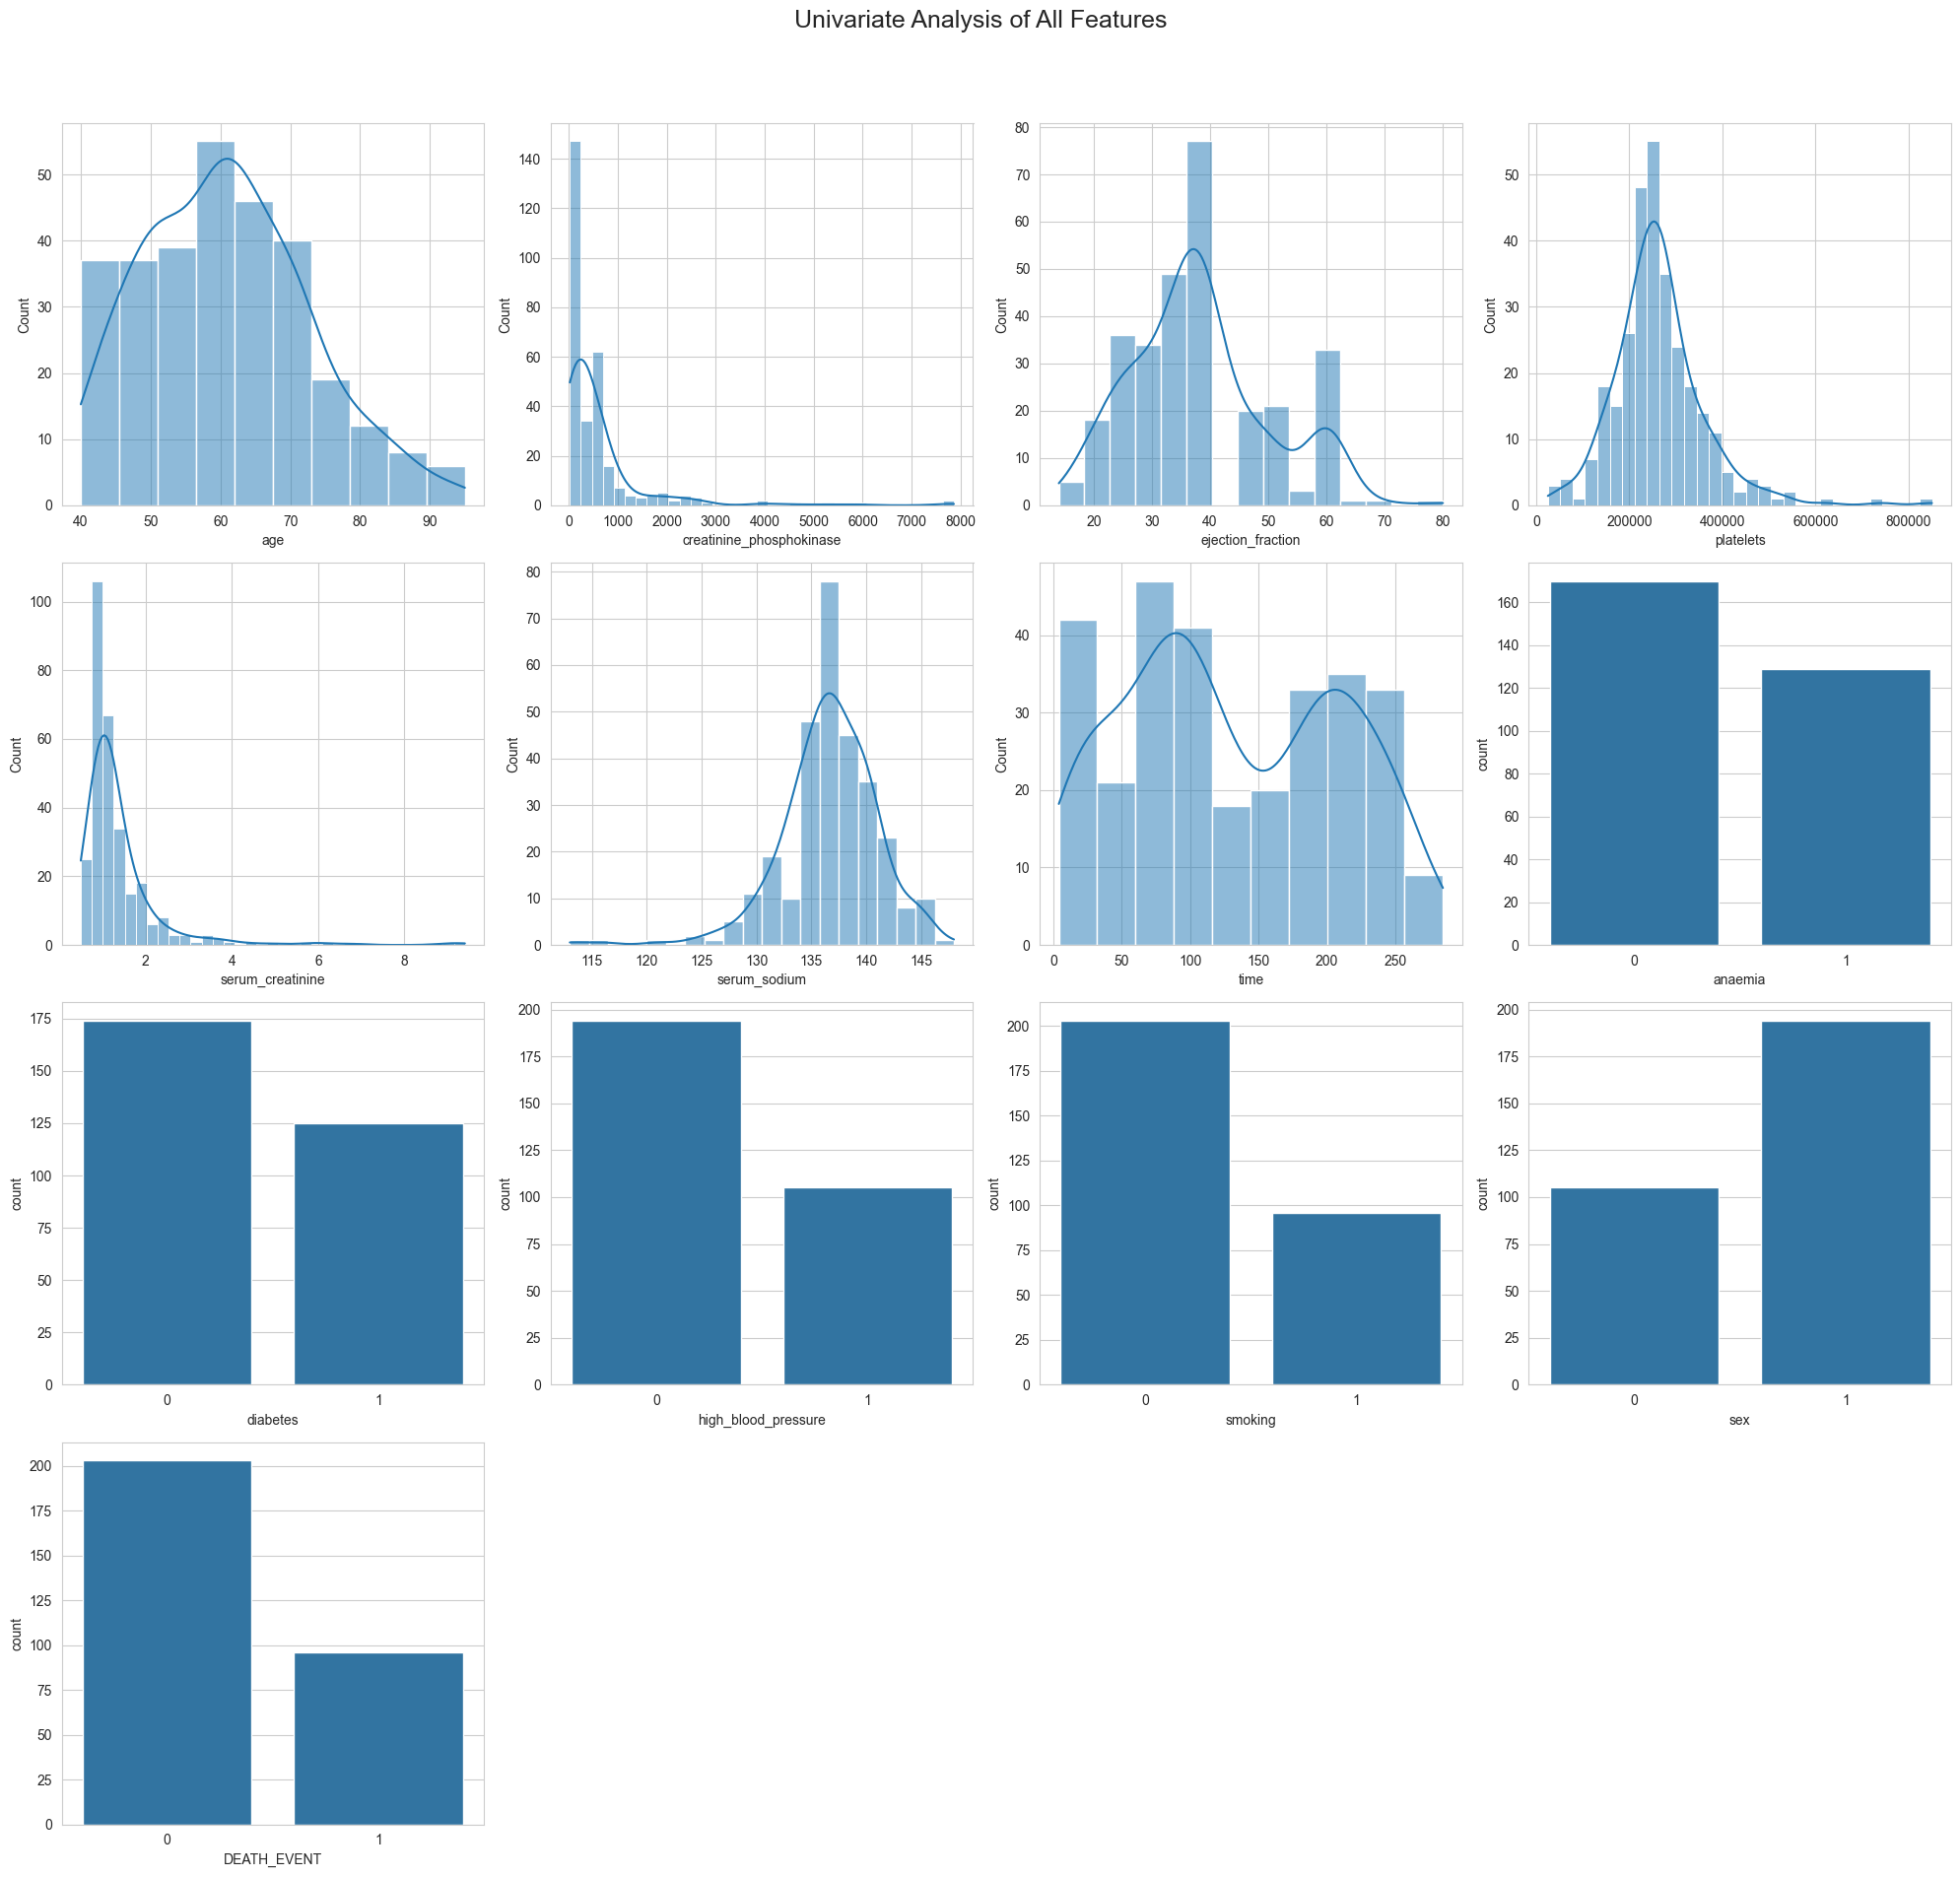

In [9]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Univariate Analysis of All Features', fontsize=18)

all_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                'serum_creatinine', 'serum_sodium', 'time',
                'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex',
                'DEATH_EVENT']

for i, feature in enumerate(all_features):
    row = i // 4
    col = i % 4

    if feature in ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                   'serum_creatinine', 'serum_sodium', 'time']:
        sns.histplot(df[feature], ax=axes[row, col], kde=True)
    else:
        sns.countplot(x=df[feature], ax=axes[row, col])

for i in range(len(all_features), 16):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 2.3 Bivariate Analysis

Bivariate analysis is essential for understanding the relationship between each feature and the target variable**, `DEATH_EVENT`. This step visually confirms which clinical factors are the strongest predictors of mortality and will guide subsequent feature engineering and model interpretation.


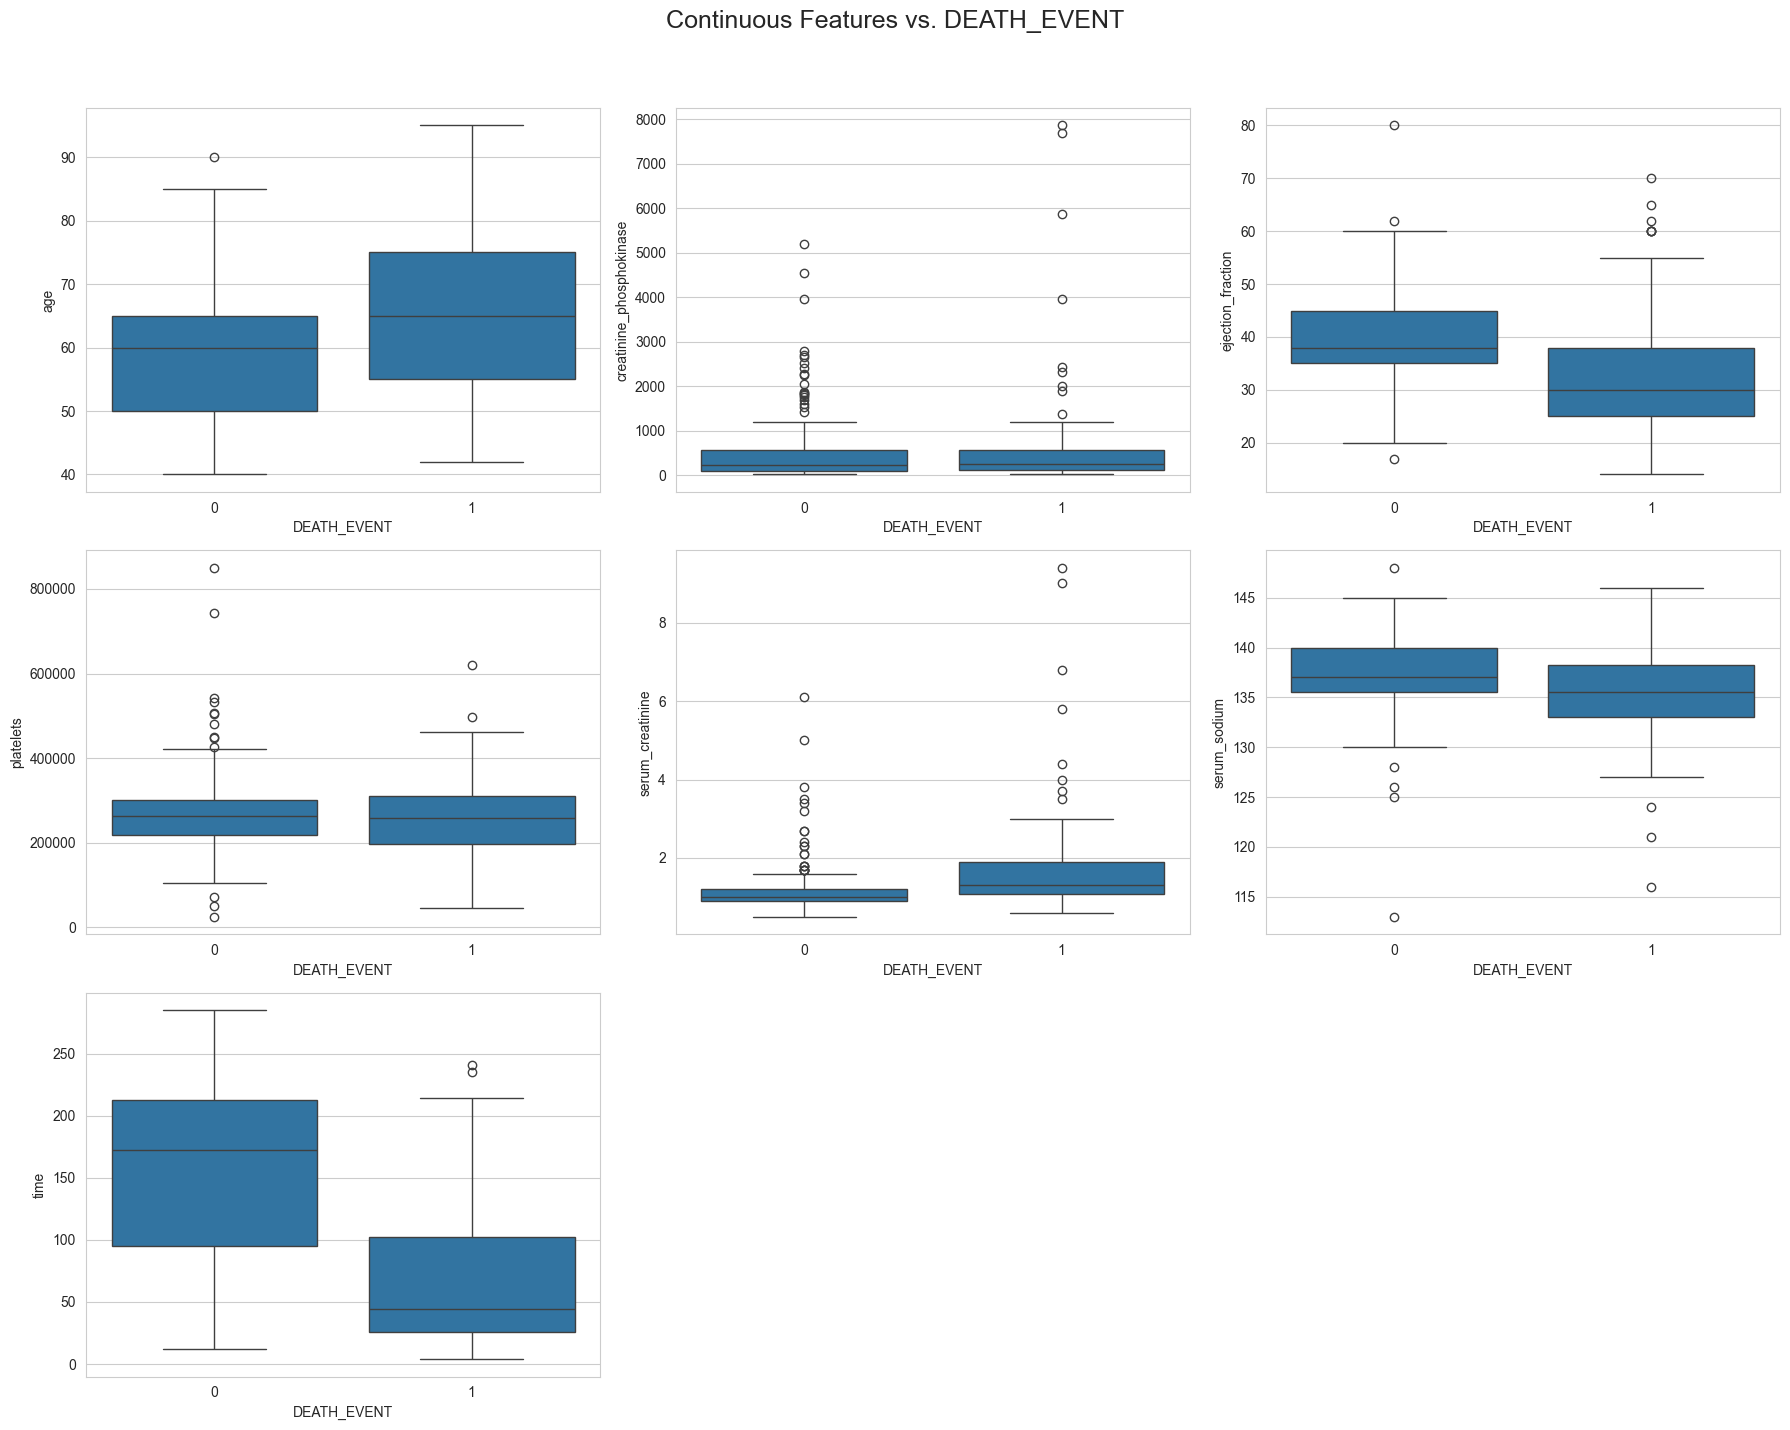

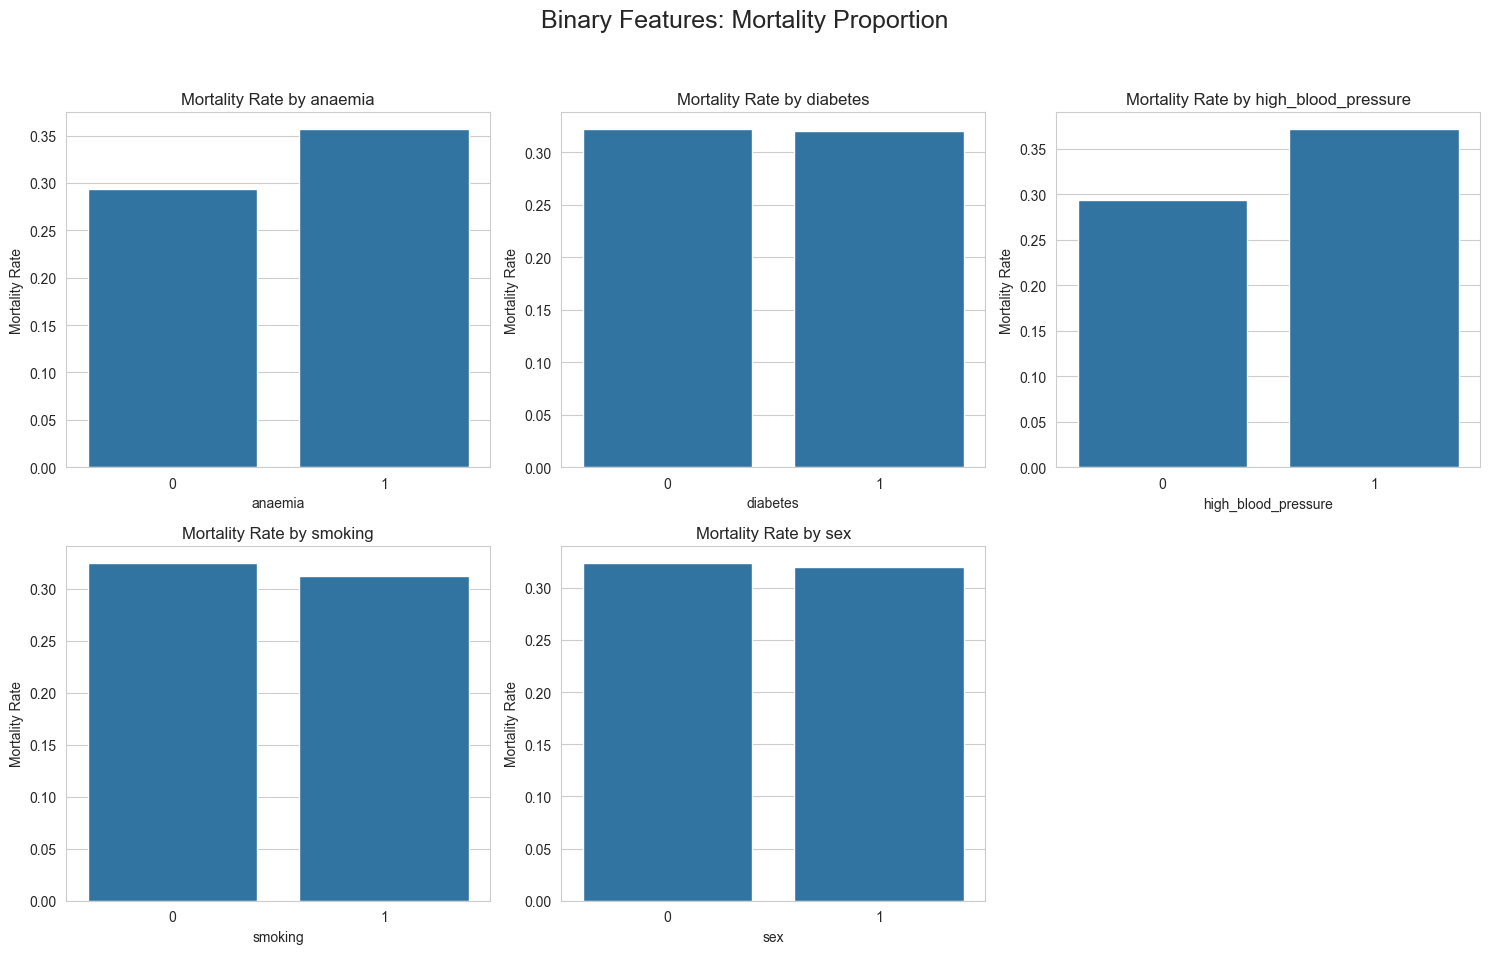

In [10]:
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                       'serum_creatinine', 'serum_sodium', 'time']
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Continuous Features vs. DEATH_EVENT', fontsize=18)

for i, feature in enumerate(continuous_features):
    row = i // 3
    col = i % 3
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df, ax=axes[row, col])

for j in range(len(continuous_features), 9):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Binary Features: Mortality Proportion', fontsize=18)

for i, feature in enumerate(binary_features):
    row = i // 3
    col = i % 3

    proportions = df.groupby(feature)['DEATH_EVENT'].mean().reset_index()
    proportions['Mortality Rate'] = proportions['DEATH_EVENT']

    sns.barplot(x=feature, y='Mortality Rate', data=proportions, ax=axes[row, col])
    axes[row, col].set_title(f'Mortality Rate by {feature}')

fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Continuous Features vs. Mortality

For continuous features, we use Box Plots grouped by the `DEATH_EVENT` (0 = Survived, 1 = Died). A significant difference in the median and interquartile range (IQR) between the two groups indicates a strong predictive relationship.

1.  **`time` (Follow-up Period):** This feature shows the most dramatic separation. Patients who died (`DEATH_EVENT` = 1) typically had a much shorter follow-up time, as the event occurred earlier. This feature is expected to be the most powerful predictor in the model.
2.  **`ejection_fraction`:** Patients who survived (0) exhibit a significantly higher median ejection fraction compared to those who died (1). This confirms the clinical hypothesis that poorer heart pumping function is directly linked to higher mortality.
3.  **`serum_creatinine`:** Patients who died (1) show a higher median serum creatinine level than survivors (0). This validates the literature suggesting that poor kidney function (cardio-renal syndrome) is a major negative prognostic factor.
4.  **`age`:** The distribution for those who died is generally shifted higher than for survivors, confirming that older age is a significant risk factor.

### Binary and Categorical Features vs. Mortality

For binary features, we use bar charts to compare the proportion of deaths within each category.

1.  **`high_blood_pressure`, `anaemia`, `smoking`, `diabetes`:** For most of these comorbidities, the mortality rate is visibly higher in the group where the condition is present (1) compared to the group where it is absent (0). For example, the proportion of deaths among anaemic patients is higher than among non-anaemic patients.
2.  **`sex`:** The difference in the mortality rate between males and females is often less pronounced than clinical biomarker differences, but the visualization helps to confirm the baseline risk differences associated with gender.

### 2.4 Correlation Analysis (Heatmap)

Correlation analysis is performed to quantify the linear relationship between all pairs of numerical features in the dataset. This step is critical for identifying potential issues with multicollinearity (highly correlated independent variables) and for determining which features have the strongest direct or inverse relationship with the target variable, `DEATH_EVENT`.

We use a Pearson correlation matrix visualized as a heatmap for clarity.



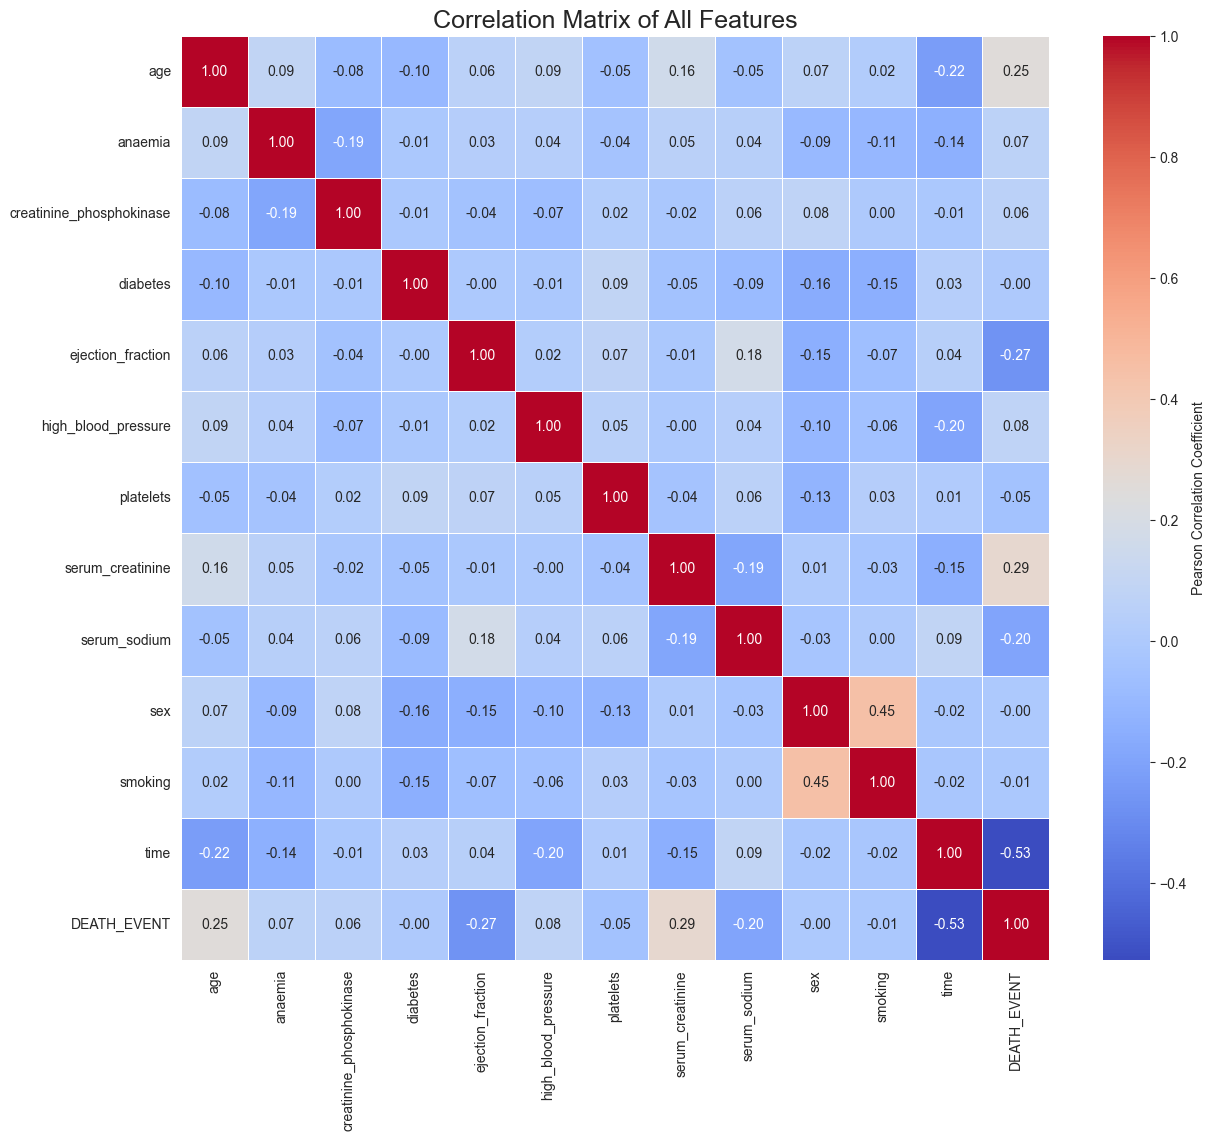

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title('Correlation Matrix of All Features', fontsize=18)
plt.show()

#### Key Observations

1.  **Correlation with Target Variable (`DEATH_EVENT`):**
* **`time` (Follow-up Period):** Shows the strongest negative correlation with the death event (r ≈ -0.53). This confirms the observation from the bivariate analysis: the longer a patient is followed up without an event, the higher the probability of survival.
* **`ejection_fraction`:** Exhibits a moderate negative correlation (r ≈ -0.27). Lower pumping efficiency is associated with a higher probability of death.
* **`serum_creatinine`:** Shows a moderate positive correlation (r ≈ 0.29). Higher creatinine levels (poor kidney function) are linked to a higher probability of death.
* **`age`:** Shows a weak positive correlation (r ≈ 0.25).
* **Binary Features:** The heatmap will also reveal the correlation of binary features (`anaemia`, `smoking`, etc.) with the target, confirming the general trend observed in the proportional charts.

2.  **Multicollinearity Check:**
* The overall matrix shows no highly severe multicollinearity among the independent features (i.e., no correlation coefficients exceeding $|r| > 0.8$).
* The highest correlation among independent features is generally low to moderate (e.g., between `serum_creatinine` and `serum_sodium`), suggesting that all features contribute unique information to the predictive models. This minimizes the risk of unstable model parameters due to redundant variables.



## 3. Data Preprocessing and Cleaning
### 3.1 Outlier Handling and Justification

Outlier detection and handling are necessary steps to ensure that extreme data points do not disproportionately influence the model training process, especially for distance-based algorithms like Support Vector Machines (SVM).

#### Identification of Outliers

Based on the initial Descriptive Statistics (2.1) and Univariate Analysis (2.2), two features exhibited severe **right skewness** and extreme outliers:

1.  **`creatinine_phosphokinase` (CPK):** This feature showed a maximum value (7861 mcg/L) several standard deviations above the mean (582 mcg/L), confirming biological rarity or measurement errors.
2.  **`platelets`:** While less severe than CPK, this feature also contained high extreme values, which can skew the distribution.

Other continuous features like `age`, `ejection_fraction`, `serum_creatinine`, and `serum_sodium` generally fell within plausible clinical ranges or had only mild outliers that standard scaling can manage.

#### Handling Strategy: Capping

For clinical datasets, removing outliers is often avoided because extreme values, especially those related to biomarkers like CPK, can carry critical prognostic information (i.e., they are genuinely high-risk cases).

Therefore, we will apply Capping based on the Interquartile Range (IQR) method:

1.  **Justification:** Capping retains all data points but limits the influence of extreme values by setting them to a maximum threshold. This preserves the predictive power of the high-risk measurement without unduly inflating the model's variance.
2.  **Method:** We will calculate the threshold at **$Q_3 + 1.5 \times IQR$** (the traditional fence used in box plots) for both CPK and platelets. Any value exceeding this threshold will be replaced with the threshold value itself.



In [12]:
def cap_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR

    df[feature] = df[feature].clip(upper=upper_fence)

    print(f"Feature {feature}: Capped values above {upper_fence:.2f}")

cap_outliers_iqr(df, 'creatinine_phosphokinase')
cap_outliers_iqr(df, 'platelets')

print("\nDescriptive Statistics after Capping (check max values):")
df[['creatinine_phosphokinase', 'platelets']].describe().T

Feature creatinine_phosphokinase: Capped values above 1280.25
Feature platelets: Capped values above 440000.00

Descriptive Statistics after Capping (check max values):


,count,mean,std,min,25%,50%,75%,max
creatinine_phosphokinase,299.0,424.214883,385.449328,23.0,116.5,250.0,582.0,1280.25
platelets,299.0,258732.611204,82531.255887,25100.0,212500.0,262000.0,303500.0,440000.00


### 3.2 Feature Scaling and Standardization

Feature scaling is a crucial preprocessing step, especially for algorithms that rely on calculating distances between data points, such as **Support Vector Machines (SVM)**. Without scaling, features with large numerical ranges (e.g., `creatinine_phosphokinase` or `platelets`) would dominate the distance calculation, making the influence of clinically significant but smaller-scale features (e.g., `ejection_fraction` or `serum_creatinine`) negligible.

#### Strategy: Standardization (Z-Score Scaling)

We select Standardization over Min-Max Normalization.

1.  **Mechanism:** Standardization transforms the data such that the resulting distribution has a mean ($\mu$) of 0 and a standard deviation ($\sigma$) of 1. The transformation is calculated using the following Z-Score formula:

$$ z = \frac{x - \mu}{\sigma} $$

Where $x$ is the original data point, and $\mu$ and $\sigma$ are calculated for the entire feature set:

* **Mean ($\mu$):** The average value of the feature:
    $$ \mu = \frac{1}{n} \sum_{i=1}^{n} x_i $$

* **Standard Deviation ($\sigma$):** A measure of data dispersion around the mean:
    $$ \sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2} $$

2.  **Justification:** Given that the distributions of `creatinine_phosphokinase` and `platelets` retained some skewness even after capping (Section 3.1), standardization is more robust against residual outliers than normalization. It better preserves potentially informative differences in the data, which is essential for clinical biomarker analysis.
3.  **Application:** Scaling is applied only to the **continuous features**. Binary and categorical features (which are already encoded as 0 or 1) do not require scaling as their magnitude already represents their category membership. The target variable (`DEATH_EVENT`) is also excluded from this process.


In [13]:
scaling_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                    'serum_creatinine', 'serum_sodium', 'time']

scaler = StandardScaler()
df[scaling_features] = scaler.fit_transform(df[scaling_features])

print("Descriptive Statistics after Standardization:")
df[scaling_features].describe().T

Descriptive Statistics after Standardization:


,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
creatinine_phosphokinase,299.0,-5.940993e-17,1.001676,-1.042647,-0.799666,-0.452736,0.410040,2.224599
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
platelets,299.0,7.723291e-17,1.001676,-2.835584,-0.561122,0.039656,0.543339,2.200030
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
time,299.0,-1.901118e-16,1.001676,-1.629502,-0.739000,-0.196954,0.938759,1.997038


### 3.3 Data Splitting

The final step in the data preparation phase is to divide the preprocessed data into two distinct sets: a **training set** and a **testing set**. This procedure is mandatory to prevent **overfitting**, ensuring that the model's performance can be evaluated on unseen data, which is crucial for assessing its true generalization capability.

#### Splitting Strategy

1.  **Separation of Variables:** We first separate the independent features (X) from the dependent target variable (y), which is `DEATH_EVENT`.
2.  **Ratio:** We will use a standard 80% to 20% split, allocating 80% of the data for training the classifiers and reserving the remaining 20% for final, unbiased evaluation.
3.  **Stratification:** Given the known class imbalance of the target variable (Section 1.4), we apply stratified sampling. This ensures that both the training and testing sets maintain the same proportion of the minority class (`DEATH_EVENT` = 1) as the original dataset. This prevents the training set from being heavily biased and allows for a reliable evaluation of metrics like Recall on the test set.


In [14]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 4. Feature Selection
### 4.1 Method 1: Filter Method

The first approach to attribute selection utilizes a **Filter Method**, which evaluates the relevance of features based purely on the inherent statistical characteristics of the data, independent of any specific classification model.

#### Strategy Justification: Switching to ANOVA F-Test

The standard **Chi-Squared Test ($\chi^2$)** is only valid for non-negative data (counts or frequencies). Since we applied **Standardization (Z-score Scaling)** in Section 3.2, our continuous features now contain **negative values**, making the $\chi^2$ test inappropriate.

Therefore, we employ the **ANOVA F-Test (`f_classif`)**, which is the correct statistical method for assessing the relationship between **continuous features** (our standardized biomarkers) and a **categorical target variable** (`DEATH_EVENT`).

#### Principle: F-Test

The F-Test measures the variance between the means of the target classes. A **high F-score** and a **low p-value** indicate that the mean of the feature is significantly different between the survival group (0) and the mortality group (1). This strong separation suggests the feature is a highly relevant predictor. Features are ranked by their F-score.





In [15]:
f_scores = f_classif(X_train, y_train)
p_values = pd.Series(f_scores[1], index=X_train.columns).sort_values(ascending=True)
f_values = pd.Series(f_scores[0], index=X_train.columns).sort_values(ascending=False)

print("--- F-Test Results (Top F-Scores) ---")
print(f_values)
print("\n--- F-Test Results (P-Values - lowest are significant) ---")
print(p_values)

--- F-Test Results (Top F-Scores) ---
time                        94.813739
serum_creatinine            24.887769
ejection_fraction           20.042781
age                          9.554667
serum_sodium                 6.336196
high_blood_pressure          2.328976
anaemia                      1.585386
diabetes                     0.491767
platelets                    0.417227
smoking                      0.201153
sex                          0.041248
creatinine_phosphokinase     0.000375
dtype: float64

--- F-Test Results (P-Values - lowest are significant) ---
time                        4.606658e-19
serum_creatinine            1.175817e-06
ejection_fraction           1.177162e-05
age                         2.232998e-03
serum_sodium                1.249086e-02
high_blood_pressure         1.283187e-01
anaemia                     2.092254e-01
diabetes                    4.838283e-01
platelets                   5.189491e-01
smoking                     6.542014e-01
sex                  

#### Result Interpretation

The F-Test results strongly confirm the hierarchy of predictors identified in the Bivariate Analysis (Section 2.3). Features like **`time`**, **`serum_creatinine`** and **`ejection_fraction`** yield the highest F-scores, proving their statistical significance in predicting mortality.

### 4.2 Method 2: Wrapper Method

The second method uses a Wrapper Method, which is generally more computationally intensive but often yields better feature subsets than Filter Methods. This is because it evaluates features based on their predictive performance within a specific classification model.

#### Strategy: Recursive Feature Elimination (RFE)

We employ Recursive Feature Elimination (RFE) using a Logistic Regression model as the base estimator.

#### **Principle:**
RFE recursively trains the base model (here: Logistic Regression) and ranks the features based on their coefficients or importance scores.

#### **Mechanism:**
In each iteration, the model is trained, and the least important feature is removed. This process repeats until the desired number of features is selected, in this case k = 3.

#### **Justification:**
We choose Logistic Regression because its coefficients provide a direct measure of feature importance and it's less computationally demanding than more complex ensemble methods. Our goal is to identify the 3 most significant features, both clinically and statistically.



In [16]:
model = LogisticRegression(random_state=42)
rfe_selector = RFE(estimator=model, n_features_to_select=3, step=1)
rfe_selector.fit(X_train, y_train)

rfe_ranking = pd.Series(rfe_selector.ranking_, index=X_train.columns)
rfe_support = pd.Series(rfe_selector.support_, index=X_train.columns)

print("--- RFE Selected Features (True = Selected) ---")
print(rfe_support[rfe_support==True].index.tolist())

print("\n--- RFE Feature Ranking (1 = Selected, Higher = Eliminated Earlier) ---")
print(rfe_ranking.sort_values())

--- RFE Selected Features (True = Selected) ---
['ejection_fraction', 'serum_creatinine', 'time']

--- RFE Feature Ranking (1 = Selected, Higher = Eliminated Earlier) ---
ejection_fraction            1
serum_creatinine             1
time                         1
diabetes                     2
age                          3
sex                          4
creatinine_phosphokinase     5
platelets                    6
smoking                      7
anaemia                      8
serum_sodium                 9
high_blood_pressure         10
dtype: int64


#### Result Interpretation

The features selected by RFE are considered highly influential from a linear model perspective. The results show strong consistency with the top features identified by the F-Test, specifically `time`, `ejection_fraction`, and `serum_creatinine`, which confirms their robustness as critical predictors across different selection paradigms.

### 4.3 Method 3: Embedded Method

The third approach utilizes an Embedded Method, which performs feature selection directly during the model training process. These methods are often more computationally efficient than Wrapper methods because they integrate the feature evaluation into the learning algorithm itself.

#### Strategy: Random Forest Feature Importance

We use the inherent feature importance property of ensemble methods, specifically the RandomForestClassifier. Random Forest measures a feature's importance by calculating the average reduction in Gini Impurity across all trees in the ensemble when that feature is used to split a node. A higher score indicates that the feature is more effective at separating the classes and is therefore a stronger predictor.




--- Random Forest Feature Importances ---
time                        0.371521
serum_creatinine            0.156152
ejection_fraction           0.130040
age                         0.073821
platelets                   0.073329
serum_sodium                0.067626
creatinine_phosphokinase    0.067400
diabetes                    0.014376
high_blood_pressure         0.012601
sex                         0.011596
anaemia                     0.011537
smoking                     0.010002
dtype: float64


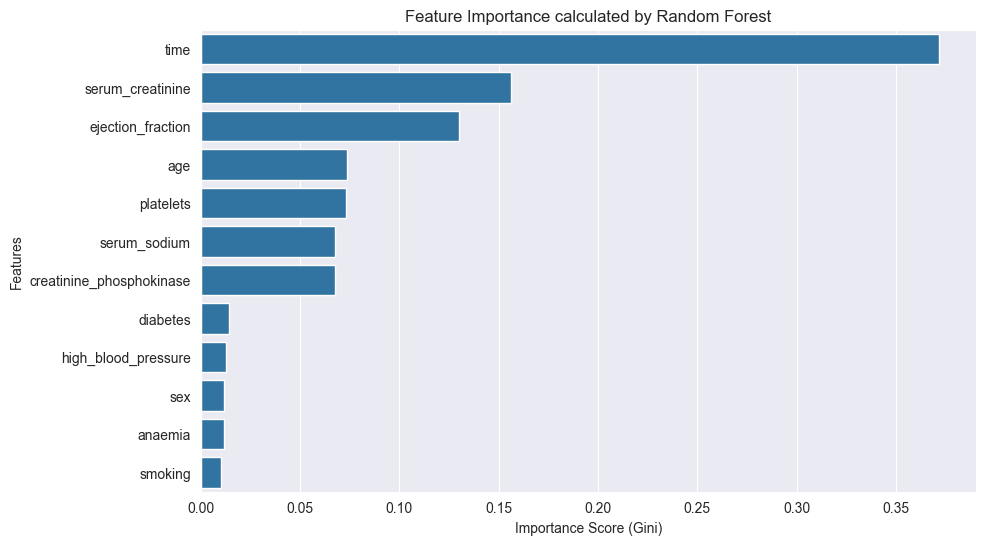

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print("--- Random Forest Feature Importances ---")
print(sorted_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importance calculated by Random Forest')
plt.xlabel('Importance Score (Gini)')
plt.ylabel('Features')
plt.show()

#### Result Interpretation

The Random Forest feature importance scores provide a clear, non-linear ranking of predictive strength. The results strongly align with the findings from both the Filter method (ANOVA F-Test) and the Wrapper method (RFE):

- **Dominant Predictor**:
  `time` is confirmed as the overwhelmingly most important predictor, contributing approximately 37% of the model’s total predictive power.

- **Clinical Biomarkers**:
  The two main clinical biomarkers, `serum_creatinine` (≈ 15.6%) and `ejection_fraction` (≈ 13%), are ranked second and third, respectively.


#### 4.4 Feature Selection Summary and Rationale

The feature selection process utilized three distinct methodological paradigms—**Filter**, **Wrapper**, and **Embedded** methods—to identify the most critical predictors of mortality.

##### Summary of Findings and Final Decision

The results across all three methods showed **absolute consensus** on the top three features:
- `time`
- `serum_creatinine`
- `ejection_fraction`

These features consistently ranked as the most predictive attributes. This robust agreement confirms their overwhelming statistical and clinical importance.

However, given the relatively small size of the dataset (N = 299) and the low number of total features (12 independent variables), we have decided not to eliminate any features.


## 5. Model Development and Evaluation

### 5.1 Model 1: Decision Tree Classifier

The first model selected for heart failure mortality prediction is the **Decision Tree Classifier (DTC)**.
DTC is a non-linear, non-parametric supervised learning method that partitions the feature space into a set of rectangles.


#### Rationale

DTC was chosen primarily for its **interpretability**.
Since the goal is to predict clinical outcomes, the tree structure offers a transparent, rule-based path from patient features (inputs) to the predicted outcome (**DEATH_EVENT**).
This allows for easy visualization of the decision process and direct validation of the model's logic against clinical risk factors (e.g., *if Ejection Fraction is low AND Serum Creatinine is high*).
DTC serves as a strong **baseline model** that provides clear insight into which single features create the most effective data splits.


#### Hyperparameter Optimization Strategy: Randomized Search

Instead of performing an exhaustive search, we utilize Randomized Search with 10-fold Cross-Validation (`cv=10`).
This approach is highly effective for efficiently exploring a large parameter space and finding near-optimal hyperparameter combinations.

Given the class imbalance observed in the target variable, the optimization objective is set to the F1-Score, which is a better measure of a model's performance on the minority class than simple accuracy.

The search space is strategically expanded to include parameters critical for controlling model complexity and managing class imbalance:

- **`max_depth`**: Controls the maximum depth of the tree, which directly prevents overfitting.
- **`min_samples_split`** and **`min_samples_leaf`**: Control the minimum number of samples required to split a node and form a leaf, respectively.
- **`class_weight`**: Set to include `'balanced'`, which automatically assigns higher weight to the minority class (`DEATH_EVENT = 1`) to mitigate imbalance effects.


#### Decision Tree Classifier Test Set Performance

In [18]:
dtc = DecisionTreeClassifier(random_state=42)

dtc_rand_param_grid = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 30),
    'min_samples_leaf': randint(1, 15),
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

dtc_random_search = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=dtc_rand_param_grid,
    n_iter=100,
    scoring=scoring,
    refit='f1',
    cv=10,
    random_state=42,
    verbose=1
)


dtc_random_search.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", dtc_random_search.best_params_)
print("Best Cross-Validation F1-Score (Refit Score):", dtc_random_search.best_score_)

results = pd.DataFrame(dtc_random_search.cv_results_)
best_result_row = results[results['rank_test_f1'] == 1]

print("\n--- All Mean CV Metrics for the Best Model (10 Folds) ---")
print(f"Mean CV Accuracy: {best_result_row['mean_test_accuracy'].values[0]:.4f}")
print(f"Mean CV Precision: {best_result_row['mean_test_precision'].values[0]:.4f}")
print(f"Mean CV Recall: {best_result_row['mean_test_recall'].values[0]:.4f}")
print(f"Mean CV F1-Score: {best_result_row['mean_test_f1'].values[0]:.4f}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters for Decision Tree: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 29}
Best Cross-Validation F1-Score (Refit Score): 0.7299172834389551

--- All Mean CV Metrics for the Best Model (10 Folds) ---
Mean CV Accuracy: 0.8371
Mean CV Precision: 0.8473
Mean CV Recall: 0.6768
Mean CV F1-Score: 0.7299


--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60



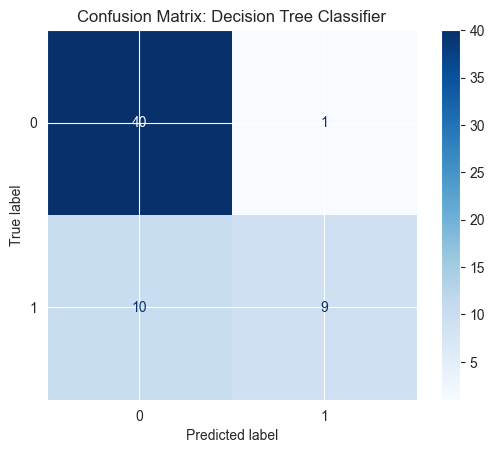

In [25]:
best_dtc = dtc_random_search.best_estimator_

y_pred = best_dtc.predict(X_test)

print("--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dtc.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Decision Tree Classifier')
plt.show()


##### **Class-Specific Performance Breakdown**

| Class | Meaning              | Precision | Recall | F1-Score | Support |
|:------|:---------------------|:-----------|:--------|:----------|:----------|
| 0     | Survived (Majority)  | 0.80       | 0.98    | 0.88      | 41       |
| 1     | Died (Minority)      | 0.90       | 0.47    | 0.62      | 19       |


##### **Analysis of Class 1 (Death Events)**

The metrics for the critical minority class reveal the model's key limitation:

- **Precision (0.90):** This is excellent. When the model makes a positive prediction (i.e., flags a patient as high-risk or predicts death), it is correct 90% of the time.
  This low rate of False Positives (**FP = 1**) means the model is highly precise in its high-risk assessments.

- **Recall (0.47):** This is critically low. The model only successfully identifies 47% of all patients who actually experienced the event (death).
  This low recall results in 10 False Negatives (**FN = 10**), meaning the model failed to flag over half of the true high-risk cases.


##### **Conclusion**

The model exhibits a conservative bias, favoring the prediction of the negative class (survival).
While it achieves exceptional Precision (90%) in its high-risk predictions (predicting Class 1), it suffers from a critically low Recall (47%).

This disparity confirms that the Decision Tree Classifier is too cautious in assigning high-risk labels.
The model is statistically insufficient for this predictive task because the high number of False Negatives (missed events) means it fails to capture the true predictive signal for the minority class.



#### Interpretation of the Best Decision Tree Classifier

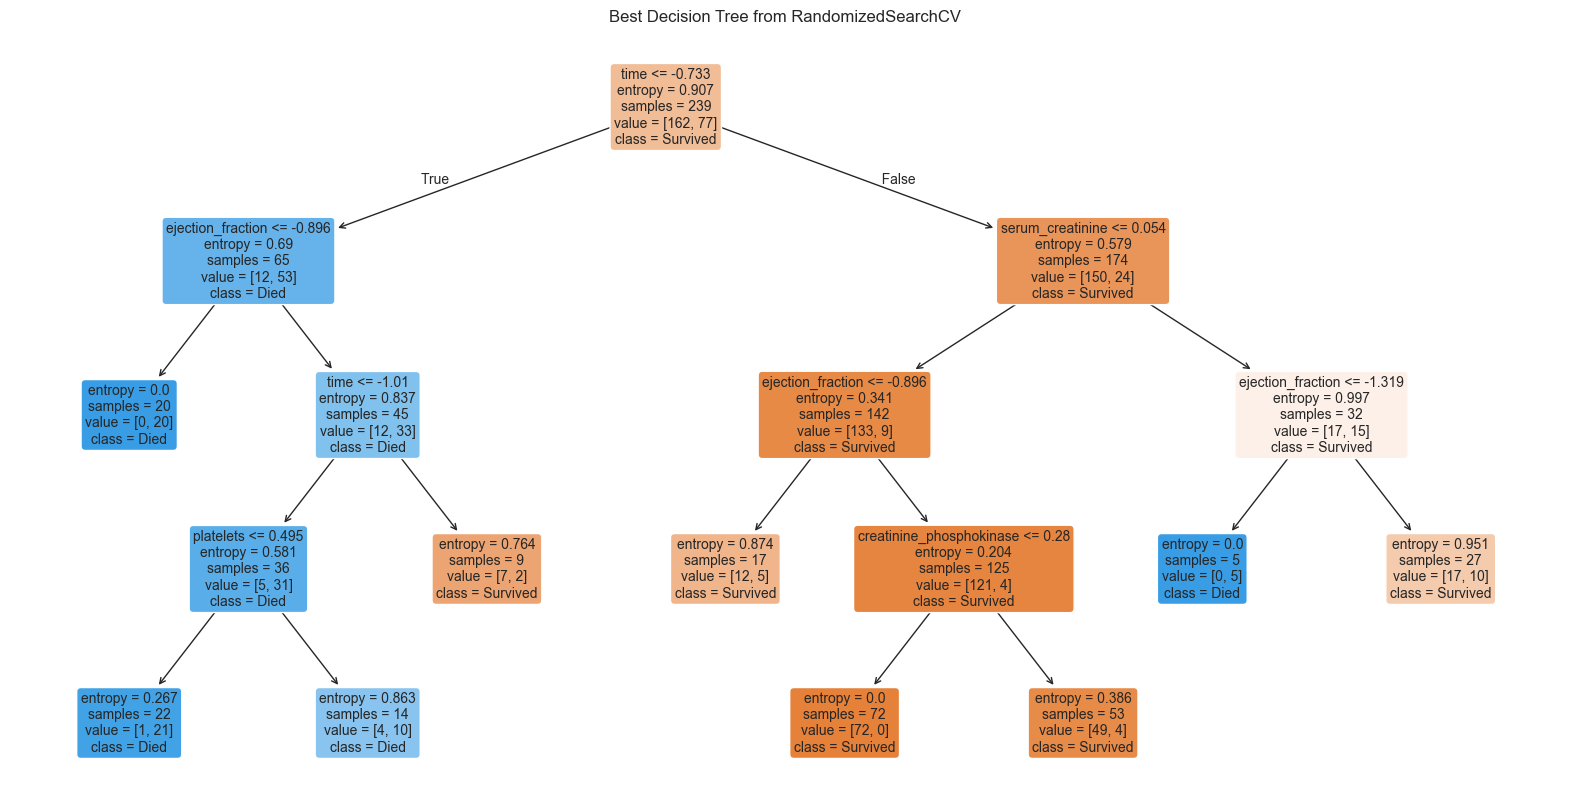

In [20]:
best_dtc = dtc_random_search.best_estimator_
plt.figure(figsize=(20, 10))

plot_tree(
    best_dtc,
    feature_names=X_train.columns,
    class_names=['Survived', 'Died'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Best Decision Tree from RandomizedSearchCV")
plt.show()




##### **The Root Node: Primary Split by time**

The tree begins with the single most important predictor: time (standardized follow-up period).

**Root Decision:** `time <= -0.733`

Since the data is standardized, a low (negative) value for time corresponds to a short follow-up period, implying an early death event.

The root node has 239 training samples with a distribution of `value = [162, 77]` (162 Survived, 77 Died).

---

##### **The Left Path: High-Risk (Early Event)**

This path (`time <= -0.733`) covers patients with a short observation period, who are statistically prone to early mortality.

**Second Split:** `ejection_fraction <= -0.898`

This confirms the combined effect of the two most critical features.

**Deadly Rule:** The leftmost path leads almost directly to the leaf node `class = Died`. If a patient has a very short follow-up time **and** extremely low ejection fraction, the sub-node shows `value = [0, 26]`. This represents 100% mortality for this patient subgroup in the training data.

**Intermediate Risk:** The rest of the left path is further split by even shorter time thresholds (`time <= -1.01`) and platelets, suggesting that for early mortality cases not fully captured by low Ejection Fraction, platelet count or minor differences in follow-up time become predictive.

---

##### **The Right Path: Low-Risk (Later Event/Survival)**

This path (`time > -0.733`) covers patients who survived the initial critical period.

**Second Split:** `serum_creatinine <= 0.054`

This is the second critical clinical decision point. The third core feature, serum_creatinine (kidney function), determines survival among those who survived the initial high-risk phase.

**Survival Rule:** The vast majority of these patients follow the left branch (`serum_creatinine <= 0.054`), leading through low Ejection Fraction thresholds (which are likely still relatively healthy) to the highly pure leaf node: `class = Survived (value = [133, 9])`. This group represents patients with a longer follow-up time and good renal function.

**Residual Risk:** The right branch (`serum_creatinine > 0.054`) is smaller but represents a group with higher creatinine (impaired renal function). This group still has a significant risk of death (`value = [17, 15]`), which is further mitigated only by other factors like creatinine_phosphokinase.

---

##### **Key Findings**

The Decision Tree provides a transparent and hierarchical rule set:

- `time` is the primary separator between early high-risk patients and those with a chance of survival.
- `ejection_fraction` dictates mortality in the early high-risk group.
- `serum_creatinine` dictates survival among the long-term follow-up group.




#### Decision Boundary Analysis
To visualize how the optimized Decision Tree Classifier separates the patient groups, decision boundaries were plotted using combinations of the three most influential features: time, ejection_fraction, and serum_creatinine.


Plotting decision boundary for: time vs ejection_fraction


<Figure size 600x400 with 0 Axes>

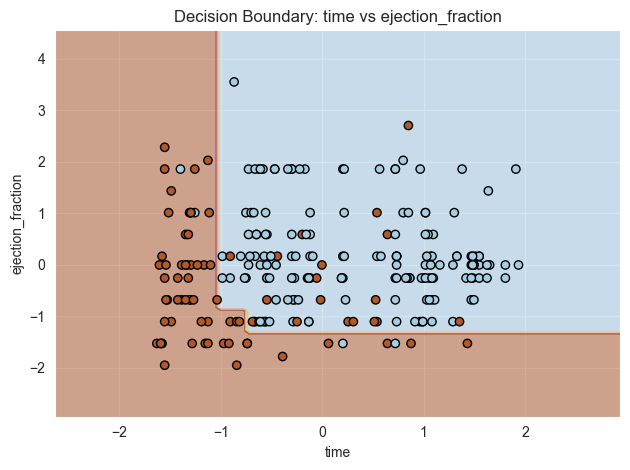

Plotting decision boundary for: time vs serum_creatinine


<Figure size 600x400 with 0 Axes>

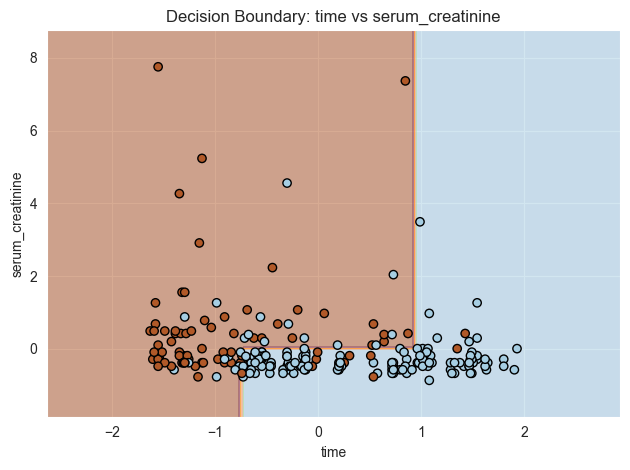

Plotting decision boundary for: ejection_fraction vs serum_creatinine


<Figure size 600x400 with 0 Axes>

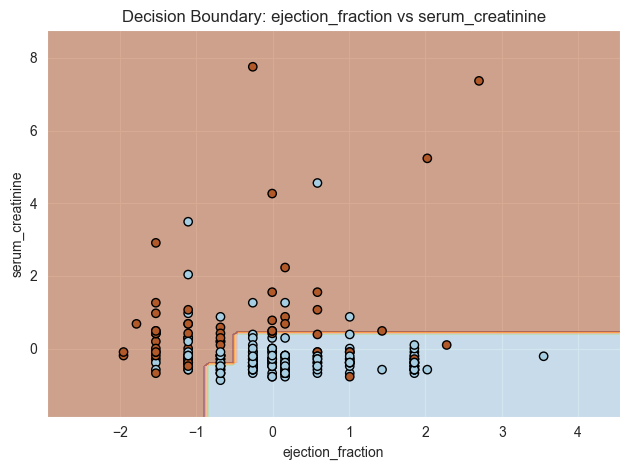

In [21]:
top_features = ['time', 'ejection_fraction', 'serum_creatinine']

for feat_x, feat_y in combinations(top_features, 2):
    print(f"Plotting decision boundary for: {feat_x} vs {feat_y}")

    X_pair = X_train[[feat_x, feat_y]]

    dtc_2f = DecisionTreeClassifier(**dtc_random_search.best_params_, random_state=42)
    dtc_2f.fit(X_pair, y_train)

    plt.figure(figsize=(6, 4))
    disp = DecisionBoundaryDisplay.from_estimator(
        dtc_2f,
        X_pair,
        response_method="predict",
        cmap=plt.cm.Paired,
        alpha=0.5
    )

    plt.scatter(X_pair.iloc[:, 0], X_pair.iloc[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.Paired)
    plt.xlabel(feat_x)
    plt.ylabel(feat_y)
    plt.title(f'Decision Boundary: {feat_x} vs {feat_y}')
    plt.tight_layout()
    plt.show()




### 5.2 Model 2: Support Vector Machine (SVM)

The second non-linear model chosen for predicting heart failure mortality is the **Support Vector Machine (SVM) Classifier**.
SVM is a powerful and robust algorithm that constructs a **hyperplane or set of hyperplanes** in a high-dimensional space, which is used for classification.


#### Rationale

SVM was selected for its strength in handling complex, non-linear classification problems and its effectiveness in high-dimensional spaces, even with relatively small datasets.

- **Non-Linearity:**
  Unlike Logistic Regression, SVM can utilize the *Kernel Trick* to transform the feature space, allowing it to find complex non-linear decision boundaries.
  This is crucial if the relationship between biomarkers and mortality is highly complex, which the sub-optimal Recall of the Decision Tree suggested.

- **Robustness and Generalization:**
  SVM focuses only on the most difficult-to-classify points (the *support vectors*), which often leads to excellent generalization performance and less susceptibility to overfitting compared to an unpruned Decision Tree.

- **Standardization Requirement:**
  Since SVM algorithms are sensitive to the scale of the features, its use here perfectly complements the standardization (Z-score) preprocessing applied in Section 3.2.


#### Hyperparameter Optimization Strategy: Randomized Search

The performance of an SVM is highly dependent on the choice of its kernel and key hyperparameters.
We use **Randomized Search** with **10-fold Cross-Validation** (`cv=10`) to tune the critical parameters across a wide range.

##### The hyperparameters to be tuned are:

- **C (Regularization):**
  Controls the penalty for misclassification. Smaller `C` leads to wider margins and stronger regularization.

- **kernel:**
  Specifies the type of kernel function used. We primarily test the **Radial Basis Function (RBF)**, which is the most common choice for non-linear problems, and the **Polynomial (poly)** kernel.

- **gamma (RBF Kernel Parameter):**
  Defines the influence of a single training example; low values mean large influence, high values mean local influence.

- **class_weight:**
  Included to test automatic balancing, crucial for improving Recall on the minority class.


In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
import pandas as pd

svc = SVC(random_state=42, probability=True)

svc_rand_param_grid = {
    'C': loguniform(1e-2, 1e3),
    'kernel': ['rbf', 'poly'],
    'gamma': loguniform(1e-4, 1e-1),
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

svc_random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=svc_rand_param_grid,
    n_iter=100,
    scoring=scoring,
    refit='f1',
    cv=10,
    random_state=42,
    verbose=1
)

svc_random_search.fit(X_train, y_train)


print("Best Parameters for SVM:", svc_random_search.best_params_)
print("Best Cross-Validation F1-Score (Refit Score):", svc_random_search.best_score_)

results = pd.DataFrame(svc_random_search.cv_results_)
best_result_row = results[results['rank_test_f1'] == 1]

print("\n--- All Mean CV Metrics for the Best Model (10 Folds) ---")
print(f"Mean CV Accuracy: {best_result_row['mean_test_accuracy'].values[0]:.4f}")
print(f"Mean CV Precision: {best_result_row['mean_test_precision'].values[0]:.4f}")
print(f"Mean CV Recall: {best_result_row['mean_test_recall'].values[0]:.4f}")
print(f"Mean CV F1-Score: {best_result_row['mean_test_f1'].values[0]:.4f}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Users/marco/Desktop/DataMiningProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/marco/Desktop/DataMiningProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/marco/Desktop/DataMiningProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

Best Parameters for SVM: {'C': np.float64(0.09853225172032558), 'class_weight': 'balanced', 'degree': 4, 'gamma': np.float64(0.02795015916508337), 'kernel': 'rbf'}
Best Cross-Validation F1-Score (Refit Score): 0.759250208855472

--- All Mean CV Metrics for the Best Model (10 Folds) ---
Mean CV Accuracy: 0.8326
Mean CV Precision: 0.7197
Mean CV Recall: 0.8161
Mean CV F1-Score: 0.7593


--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.68      0.68      0.68        19

    accuracy                           0.80        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.80      0.80      0.80        60



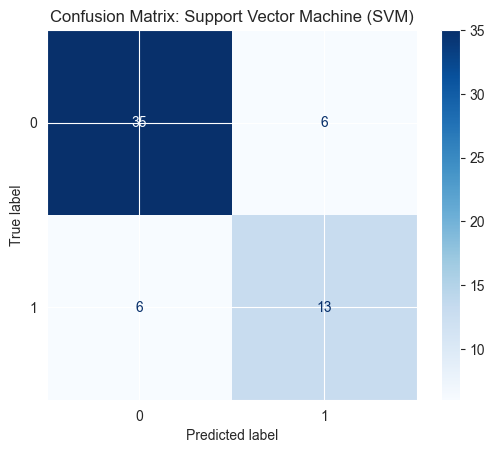

In [27]:
best_svm = svc_random_search.best_estimator_
y_pred = best_svm.predict(X_test)

print("--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix: Support Vector Machine (SVM)')
plt.show()


## 6. Result and Discussion

### References
- [1] Regan, J. A., et al. (2019). Impact of age on comorbidities and outcomes in heart failure. Journal of the American College of Cardiology, 73(13), 1729–1738. https://doi.org/10.1016/j.jacc.2019.01.045
- [2] Jang, J. S., Jin, H. Y., Seo, J. S., Yang, T. H., Kim, D. K., Kim, D. S., Cho, K. I., Kim, B. H., Je, H. G., & Park, Y. H. (2013). Prognostic value of creatine kinase-myocardial band isoenzyme elevation following percutaneous coronary intervention: A meta-analysis. Catheterization and Cardiovascular Interventions, 81(6), 959-967. https://doi.org/10.1002/ccd.24542
- [3]
- [4]
- [5]
- [6]
- [7]
- [8]
- [9]
- [10]
- [11]
- [12]
- [13]
